Import basic tools and Dance Object, used for turning joint-position data into a dataframe of features

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
from DanceProj1.DanceObj import Dance

import matplotlib.pyplot as plt
import seaborn as sns

Use Dance class obj on data and make feature-dataframe. See data_proc.py for details.

In [2]:
from DanceProj1.data_proc import get_data

aistpath = '../../aist_keypoints' #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data. Comes with joint-position-frame arrays and an id

Make sure data is loaded

In [3]:
print('data is dict with keys = genres', dataBM.keys())
print('values are tuples (pairs) = (posdata, id)')
print('first break piece data shape (joints, frames, xyz):', dataBM['Break'][0][0].shape)
print('id of first break piece: ', dataBM['Break'][0][1])

data is dict with keys = genres dict_keys(['Break', 'Pop', 'Lock', 'Midhop', 'LAhop', 'House', 'Waack', 'Krump', 'Street Jazz', 'Ballet Jazz'])
values are tuples (pairs) = (posdata, id)
first break piece data shape (joints, frames, xyz): (15, 443, 3)
id of first break piece:  gBR_sBM_cAll_d05_mBR5_ch10


Look at basic stats for frames and seconds in the data

In [11]:
total_frames = 0
total_sequences = 0
frames_sequences = []

for genre in dataFM.keys():
    for sequence in dataFM[genre]:
        posdata = sequence[0]  # posdata is the first element in the tuple
        frames = posdata.shape[1]  # Number of frames is the second dimension
        total_frames += frames
        frames_sequences.append(frames)  # Append frames to the list
        total_sequences += 1

average_frames = total_frames / total_sequences  # Average number of frames per sequence
std_frames = sum((x - average_frames) ** 2 for x in frames_sequences) / total_sequences
std_frames = std_frames ** 0.5  # Calculate the standard deviation
print("Average number of Adv frames:", average_frames)
print("Standard deviation of Adv frames:", std_frames)
average_seconds = average_frames / 60  # Average number of seconds per sequence
print("Average number of Adv seconds:", average_seconds)
std_seconds = std_frames / 60
print("Standard deviation of Adv seconds:", std_seconds)


total_frames = 0
total_sequences = 0
frames_sequences = []

for genre in dataBM.keys():
    for sequence in dataBM[genre]:
        posdata = sequence[0]  # posdata is the first element in the tuple
        frames = posdata.shape[1]  # Number of frames is the second dimension
        total_frames += frames
        frames_sequences.append(frames)  # Append frames to the list
        total_sequences += 1

average_frames = total_frames / total_sequences  # Average number of frames per sequence
std_frames = sum((x - average_frames) ** 2 for x in frames_sequences) / total_sequences
std_frames = std_frames ** 0.5  # Calculate the standard deviation
print("Average number of Bas frames:", average_frames)
print("Standard deviation of Bas frames:", std_frames)
average_seconds = average_frames / 60  # Average number of seconds per sequence
print("Average number of Bas seconds:", average_seconds)
std_seconds = std_frames / 60
print("Standard deviation of Bas seconds:", std_seconds)



Average number of Adv frames: 2190.683417085427
Standard deviation of Adv frames: 367.05687436893106
Average number of Adv seconds: 36.51139028475712
Standard deviation of Adv seconds: 6.117614572815517
Average number of Bas frames: 554.5954962468724
Standard deviation of Bas frames: 94.34723196725494
Average number of Bas seconds: 9.243258270781206
Standard deviation of Bas seconds: 1.5724538661209158


Turn the data into Dance objects. This is a class that has methods for computing features. See DanceObj.py for details - it is contained in data_to_features.

The variable "sparse" sets whether all of the features in DanceObj are pulled as data (sparse=False), or only a selected subset of the features (sparse=True). But "Sparse" is no longer used anywhere and should probably be deleted or ignored.

In [4]:
from DanceProj1.data_proc import data_to_features

dfBM, dfFM = data_to_features(dataBM, dataFM)

#data to windowed features should be tried out next

there were index errors on 0 dances


Count advanced and basic sequences

In [5]:
print('There are', len(dfFM.index), 'Advanced sequences and', len(dfBM.index), 'Basic sequences')

There are 199 Advanced sequences and 1199 Basic sequences


Check the dataframes

In [6]:
print('There are', len(dfBM.columns)-2, 'features, plus the genre and id columns')
dfBM.head()

There are 18 features, plus the genre and id columns


,id,Genre,window size,sacrum_std,sacrum_jerkiness,sacrum_bounciness,angularmomentumxz,angularmomentumy,angularmomentumxzstd,angularmomentumystd,ypeaks,xzpeaks,wrist_acceleration,wrist_accel_std,ankle_acceleration,ankle_accel_std,ankle_height,ankle_height_std,expandedness,expandedness_std
0,gBR_sBM_cAll_d05_mBR5_ch10,Break,None,5.992518,848.679147,2.071357,925.392047,-567.378827,4046.137286,2972.010425,0.020316,0.020316,147.424021,88.787879,318.962386,250.883127,46.663169,5.928026,1067.622148,50.415361
1,gBR_sBM_cAll_d05_mBR1_ch03,Break,None,10.249365,1200.340658,-7.119799,-1534.771429,902.808415,5323.030246,1358.511140,0.025000,0.026562,413.547603,268.562169,313.218737,136.682169,55.947479,11.940312,1083.575293,142.153402
2,gBR_sBM_cAll_d06_mBR3_ch09,Break,None,6.891047,886.781045,10.341320,-679.871530,4267.835425,3159.626132,3289.583241,0.019084,0.015267,365.190907,222.766754,320.970867,223.629090,45.538936,8.603254,985.561049,104.975424
3,gBR_sBM_cAll_d06_mBR2_ch08,Break,None,9.965547,1540.719848,-6.950339,1204.119479,-10.956133,5606.692007,6977.001949,0.034722,0.038194,425.767409,231.297827,368.445909,287.946463,50.457224,9.825650,1020.270512,80.674363
4,gBR_sBM_cAll_d05_mBR4_ch10,Break,None,6.278031,695.688095,-12.836462,631.332889,-505.157613,5016.263532,2715.459404,0.020833,0.018750,165.426652,110.913805,283.075792,215.987937,44.370835,3.275988,1107.946863,49.744991


In [6]:
#show featurenames
dfFM.columns

Index(['id', 'Genre', 'sacrum_std', 'sacrum_jerkiness', 'sacrum_bounciness',
       'angularmomentumxz', 'angularmomentumy', 'angularmomentumxzstd',
       'angularmomentumystd', 'ypeaks', 'xzpeaks', 'wrist_acceleration',
       'wrist_accel_std', 'ankle_acceleration', 'ankle_accel_std',
       'ankle_height', 'ankle_height_std', 'expandedness', 'expandedness_std'],
      dtype='object')

In [8]:
#show genre names
print(dfFM['Genre'].unique())

['Break' 'Pop' 'Lock' 'Midhop' 'LAhop' 'House' 'Waack' 'Krump'
 'Street Jazz' 'Ballet Jazz']


In [23]:
#list all the features
print(dfBM.columns)

Index(['id', 'Genre', 'sacrum_std', 'sacrum_jerkiness', 'sacrum_bounciness',
       'angularmomentumxz', 'angularmomentumy', 'angularmomentumxzstd',
       'angularmomentumystd', 'ypeaks', 'xzpeaks', 'wrist_acceleration',
       'wrist_accel_std', 'ankle_acceleration', 'ankle_accel_std',
       'ankle_height', 'ankle_height_std', 'expandedness', 'expandedness_std'],
      dtype='object')


In [8]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfFM_scaled = pd.DataFrame(scaler.fit_transform(dfFM.drop(['Genre', 'id'], axis=1)), columns=dfFM.drop(['Genre', 'id'], axis=1).columns)
dfBM_scaled = pd.DataFrame(scaler.fit_transform(dfBM.drop(['Genre', 'id'], axis=1)), columns=dfBM.drop(['Genre', 'id'], axis=1).columns)

dfFM_scaled['Genre'] = dfFM['Genre']
dfBM_scaled['Genre'] = dfBM['Genre']


In [9]:
dfFM_scaled.head()

,sacrum_std,sacrum_jerkiness,sacrum_bounciness,angularmomentumxz,angularmomentumy,angularmomentumxzstd,angularmomentumystd,ypeaks,xzpeaks,wrist_acceleration,wrist_accel_std,ankle_acceleration,ankle_accel_std,ankle_height,ankle_height_std,expandedness,expandedness_std,Genre
0,0.289450,0.377183,-1.680877,-0.990355,1.654307,1.599398,0.365944,0.384263,0.566484,1.013880,0.508676,0.774147,1.790028,0.440852,2.174497,0.851939,0.027460,Break
1,-0.433074,1.828873,0.612959,0.014673,1.373518,1.650490,0.453739,0.654273,-0.096962,1.008204,0.842316,1.515609,1.919456,0.233464,1.328596,1.593847,0.498825,Break
2,0.003795,0.713917,-0.084789,-0.584464,1.692504,0.432021,0.586774,1.261536,0.362586,0.529937,0.138761,0.721439,0.114426,0.245286,0.034895,0.095588,0.307366,Break
3,-0.231732,0.311704,0.613299,-0.583028,0.518722,1.050867,2.015175,0.727369,0.555427,0.142785,0.294054,1.193813,1.215395,0.362207,-0.107130,1.269722,0.498282,Break
4,-0.231958,1.442530,-0.621055,-1.420997,1.104173,1.099030,1.302600,0.749794,0.668433,1.621241,0.745819,1.829354,1.029125,1.010442,0.190844,1.312218,0.322649,Break


In [10]:
# group by genre
grouped = dfFM_scaled.groupby('Genre')

# create separate dataframes for each genre
dfABJazz_scaled = grouped.get_group('Ballet Jazz').drop(['Genre'], axis=1)
dfABreak_scaled = grouped.get_group('Break').drop(['Genre'], axis=1)
dfAPop_scaled = grouped.get_group('Pop').drop(['Genre'], axis=1)
dfALock_scaled = grouped.get_group('Lock').drop(['Genre'], axis=1)
dfAMidhop_scaled = grouped.get_group('Midhop').drop(['Genre'], axis=1)
dfALAhop_scaled = grouped.get_group('LAhop').drop(['Genre'], axis=1)
dfAHouse_scaled = grouped.get_group('House').drop(['Genre'], axis=1)
dfAWaack_scaled = grouped.get_group('Waack').drop(['Genre'], axis=1)
dfAKrump_scaled = grouped.get_group('Krump').drop(['Genre'], axis=1)
dfASJazz_scaled = grouped.get_group('Street Jazz').drop(['Genre'], axis=1)

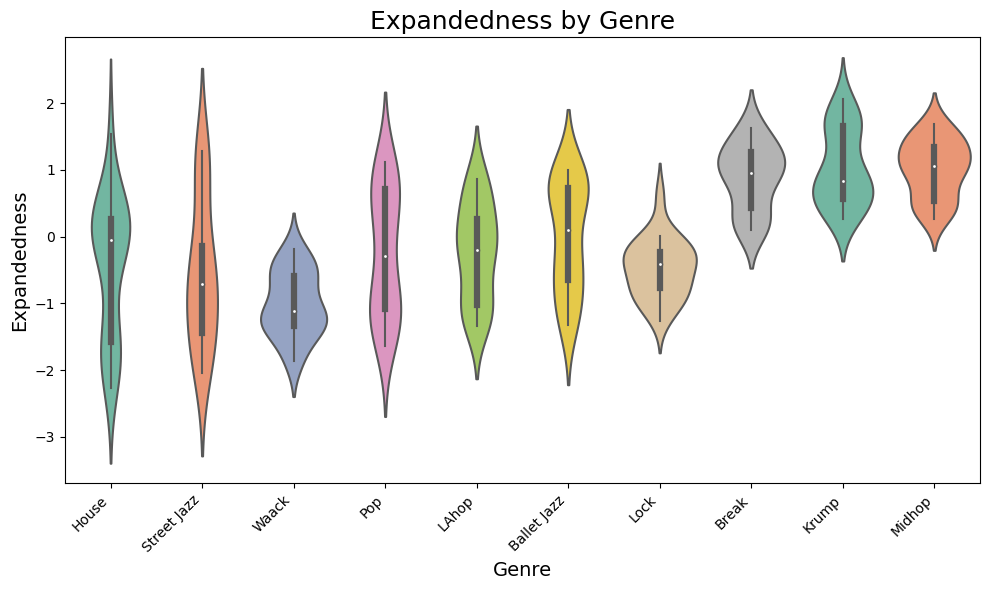

In [11]:
#Violion plot of Expandedness on y axis, dance genre on X axis, ordered by expandedness
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=10)
sns.violinplot(data=dfFM_scaled.sort_values(by='expandedness'), x='Genre', y='expandedness', palette=colors)
plt.title('Expandedness by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Expandedness', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../plots/feature_plots/Expandednessviolin.png')
plt.show()

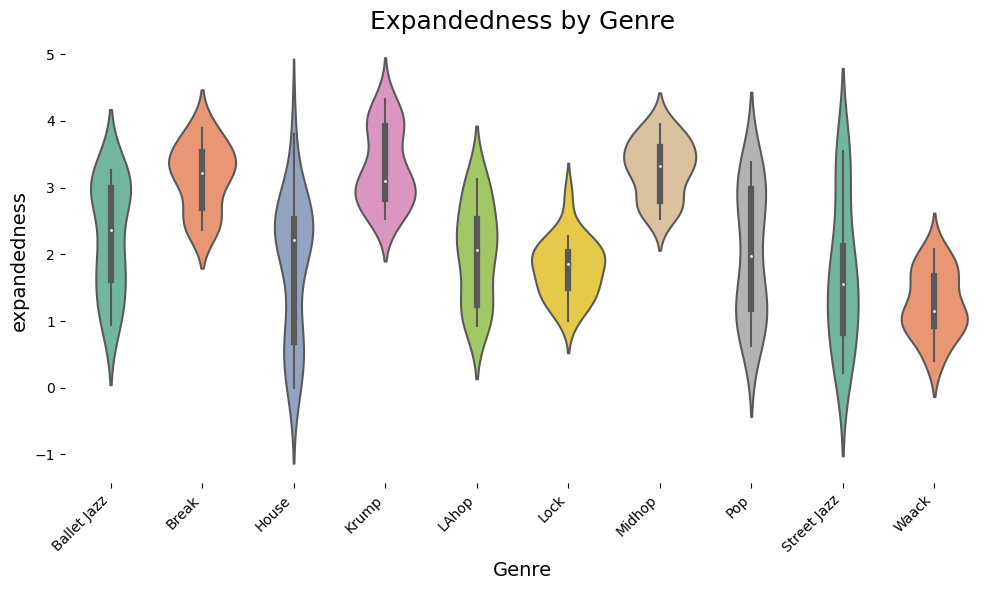

In [30]:
# Violin plot of expandedness on y axis, dance genre on X axis, ordered by expandedness
# Move everything up on the y axis so the lowest value is 0
dfFM_scaled['expandedness'] = dfFM_scaled['expandedness'] - dfFM_scaled['expandedness'].min()

# Sort genres in alphabetical order
genres = sorted(dfFM_scaled['Genre'].unique())


plt.figure(figsize=(10, 6))

# Use a simple, monochromatic color palette
colors = sns.color_palette('Set2', n_colors=10)

sns.violinplot(data=dfFM_scaled.sort_values(by='expandedness'), x='Genre', y='expandedness', palette=colors, order=genres)

plt.title('Expandedness by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('expandedness', fontsize=14)
plt.xticks(rotation=45, ha='right')


# Remove the box around the plot
sns.despine(left=True, bottom=True)

#save the figure to my desktop with a transparent background
plt.savefig('../plots/feature_plots/expandednessviolin_transp.png', transparent=True)

plt.tight_layout()
plt.show()


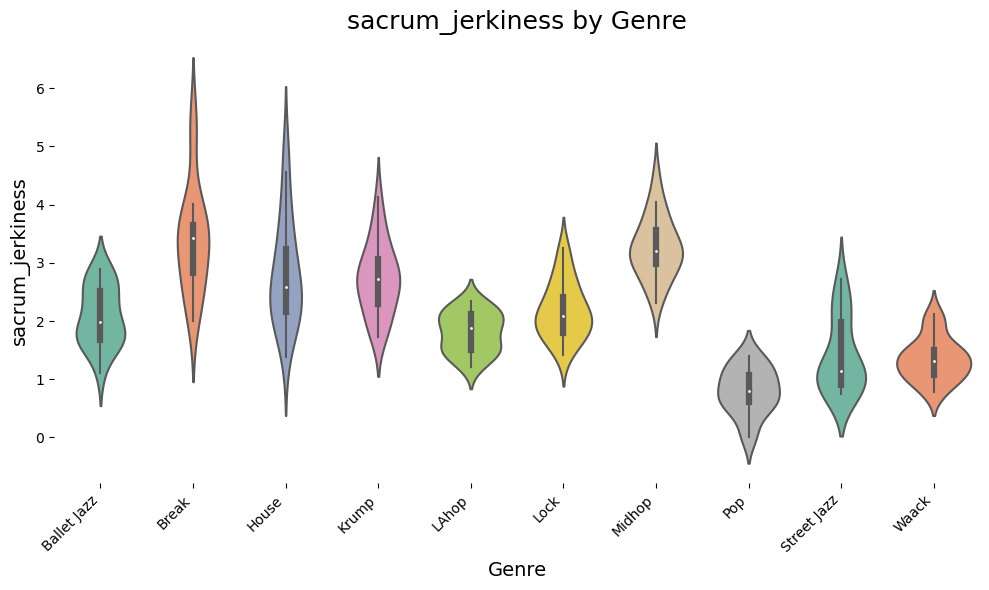

In [31]:
# Violin plot of sacrum_jerkiness on y axis, dance genre on X axis, ordered by sacrum_jerkiness
# Move everything up on the y axis so the lowest value is 0
dfFM_scaled['sacrum_jerkiness'] = dfFM_scaled['sacrum_jerkiness'] - dfFM_scaled['sacrum_jerkiness'].min()

# Sort genres in alphabetical order
genres = sorted(dfFM_scaled['Genre'].unique())


plt.figure(figsize=(10, 6))

# Use a simple, monochromatic color palette
colors = sns.color_palette('Set2', n_colors=10)

sns.violinplot(data=dfFM_scaled.sort_values(by='sacrum_jerkiness'), x='Genre', y='sacrum_jerkiness', palette=colors, order=genres)

plt.title('sacrum_jerkiness by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('sacrum_jerkiness', fontsize=14)
plt.xticks(rotation=45, ha='right')


# Remove the box around the plot
sns.despine(left=True, bottom=True)

#save the figure to my desktop with a transparent background
#plt.savefig('../plots/feature_plots/sacrum_jerkinessviolin_transp.png', transparent=True)

plt.tight_layout()
plt.show()

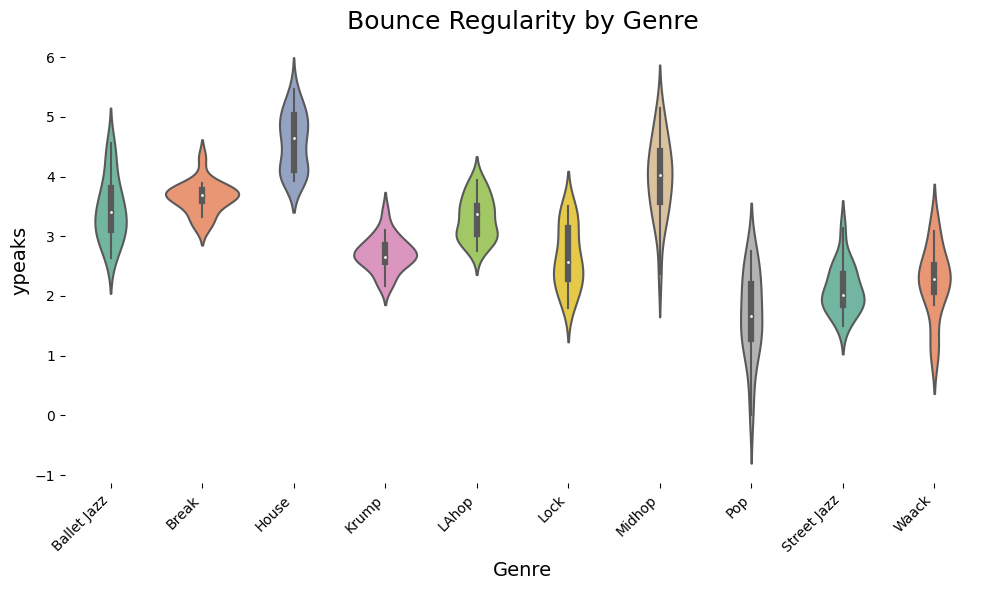

In [29]:
# Violin plot of ypeaks on y axis, dance genre on X axis, ordered by ypeaks
# Move everything up on the y axis so the lowest value is 0
dfFM_scaled['ypeaks'] = dfFM_scaled['ypeaks'] - dfFM_scaled['ypeaks'].min()

# Sort genres in alphabetical order
genres = sorted(dfFM_scaled['Genre'].unique())


plt.figure(figsize=(10, 6))

# Use a simple, monochromatic color palette
colors = sns.color_palette('Set2', n_colors=10)

sns.violinplot(data=dfFM_scaled.sort_values(by='ypeaks'), x='Genre', y='ypeaks', palette=colors, order=genres)

plt.title('Bounce Regularity by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('ypeaks', fontsize=14)
plt.xticks(rotation=45, ha='right')


# Remove the box around the plot
sns.despine(left=True, bottom=True)

#save the figure to my desktop with a transparent background
plt.savefig('../plots/feature_plots/ypeaksviolin_transp.png', transparent=True)

plt.tight_layout()
plt.show()

In [17]:
#list all the features
dfFM_scaled.columns

Index(['sacrumstd', 'sacrumjerkmag', 'sacrumjerky', 'angularmomentumxz',
       'angularmomentumy', 'angularmomentumxzstd', 'angularmomentumystd',
       'ypeaks', 'xzpeaks', 'wristacceleration', 'wristaccstd',
       'ankleacceleration', 'ankleaccstd', 'ankleheight', 'ankleheightstd',
       'Expandedness', 'Expandedness_std', 'Genre'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

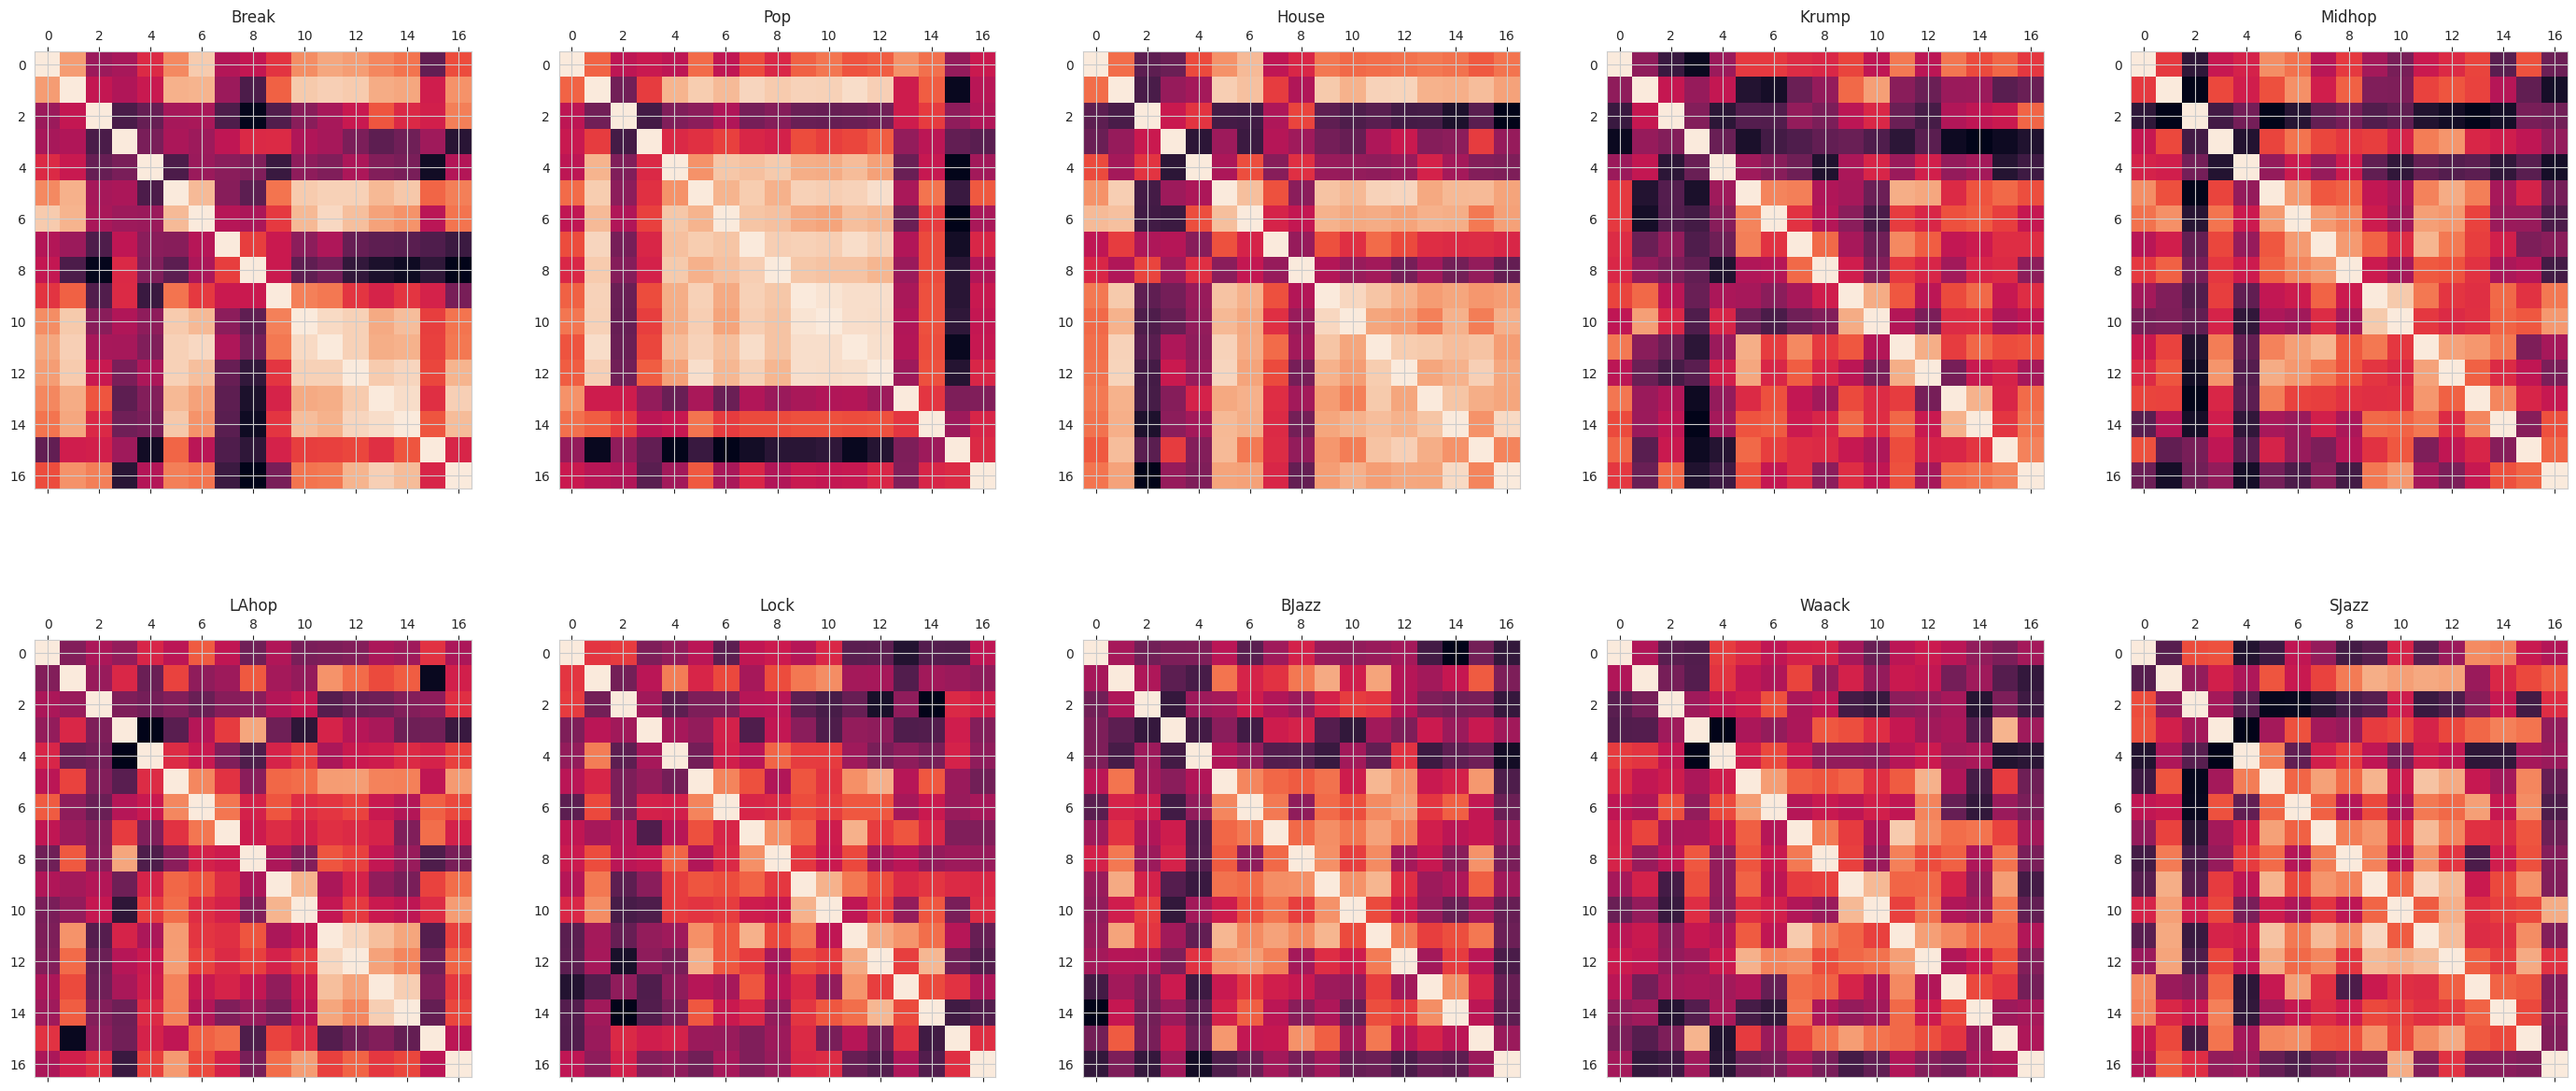

In [22]:
#same plot as above but 2 by 5 instead of 5 by 2, with les white space
fig, axs = plt.subplots(2, 5, figsize=(35, 15))
axs[0, 0].matshow(dfABreak_scaled.corr())
axs[0, 0].set_title('Break')
axs[0, 1].matshow(dfAPop_scaled.corr())
axs[0, 1].set_title('Pop')
axs[0, 2].matshow(dfAHouse_scaled.corr())
axs[0, 2].set_title('House')
axs[0, 3].matshow(dfAKrump_scaled.corr())
axs[0, 3].set_title('Krump')
axs[0, 4].matshow(dfAMidhop_scaled.corr())
axs[0, 4].set_title('Midhop')
axs[1, 0].matshow(dfALAhop_scaled.corr())
axs[1, 0].set_title('LAhop')
axs[1, 1].matshow(dfALock_scaled.corr())
axs[1, 1].set_title('Lock')
axs[1, 2].matshow(dfABJazz_scaled.corr())
axs[1, 2].set_title('BJazz')
axs[1, 3].matshow(dfAWaack_scaled.corr())
axs[1, 3].set_title('Waack')
axs[1, 4].matshow(dfASJazz_scaled.corr())
axs[1, 4].set_title('SJazz')

plt.savefig('AdvFeatCorr_allgenres.png')
plt.show

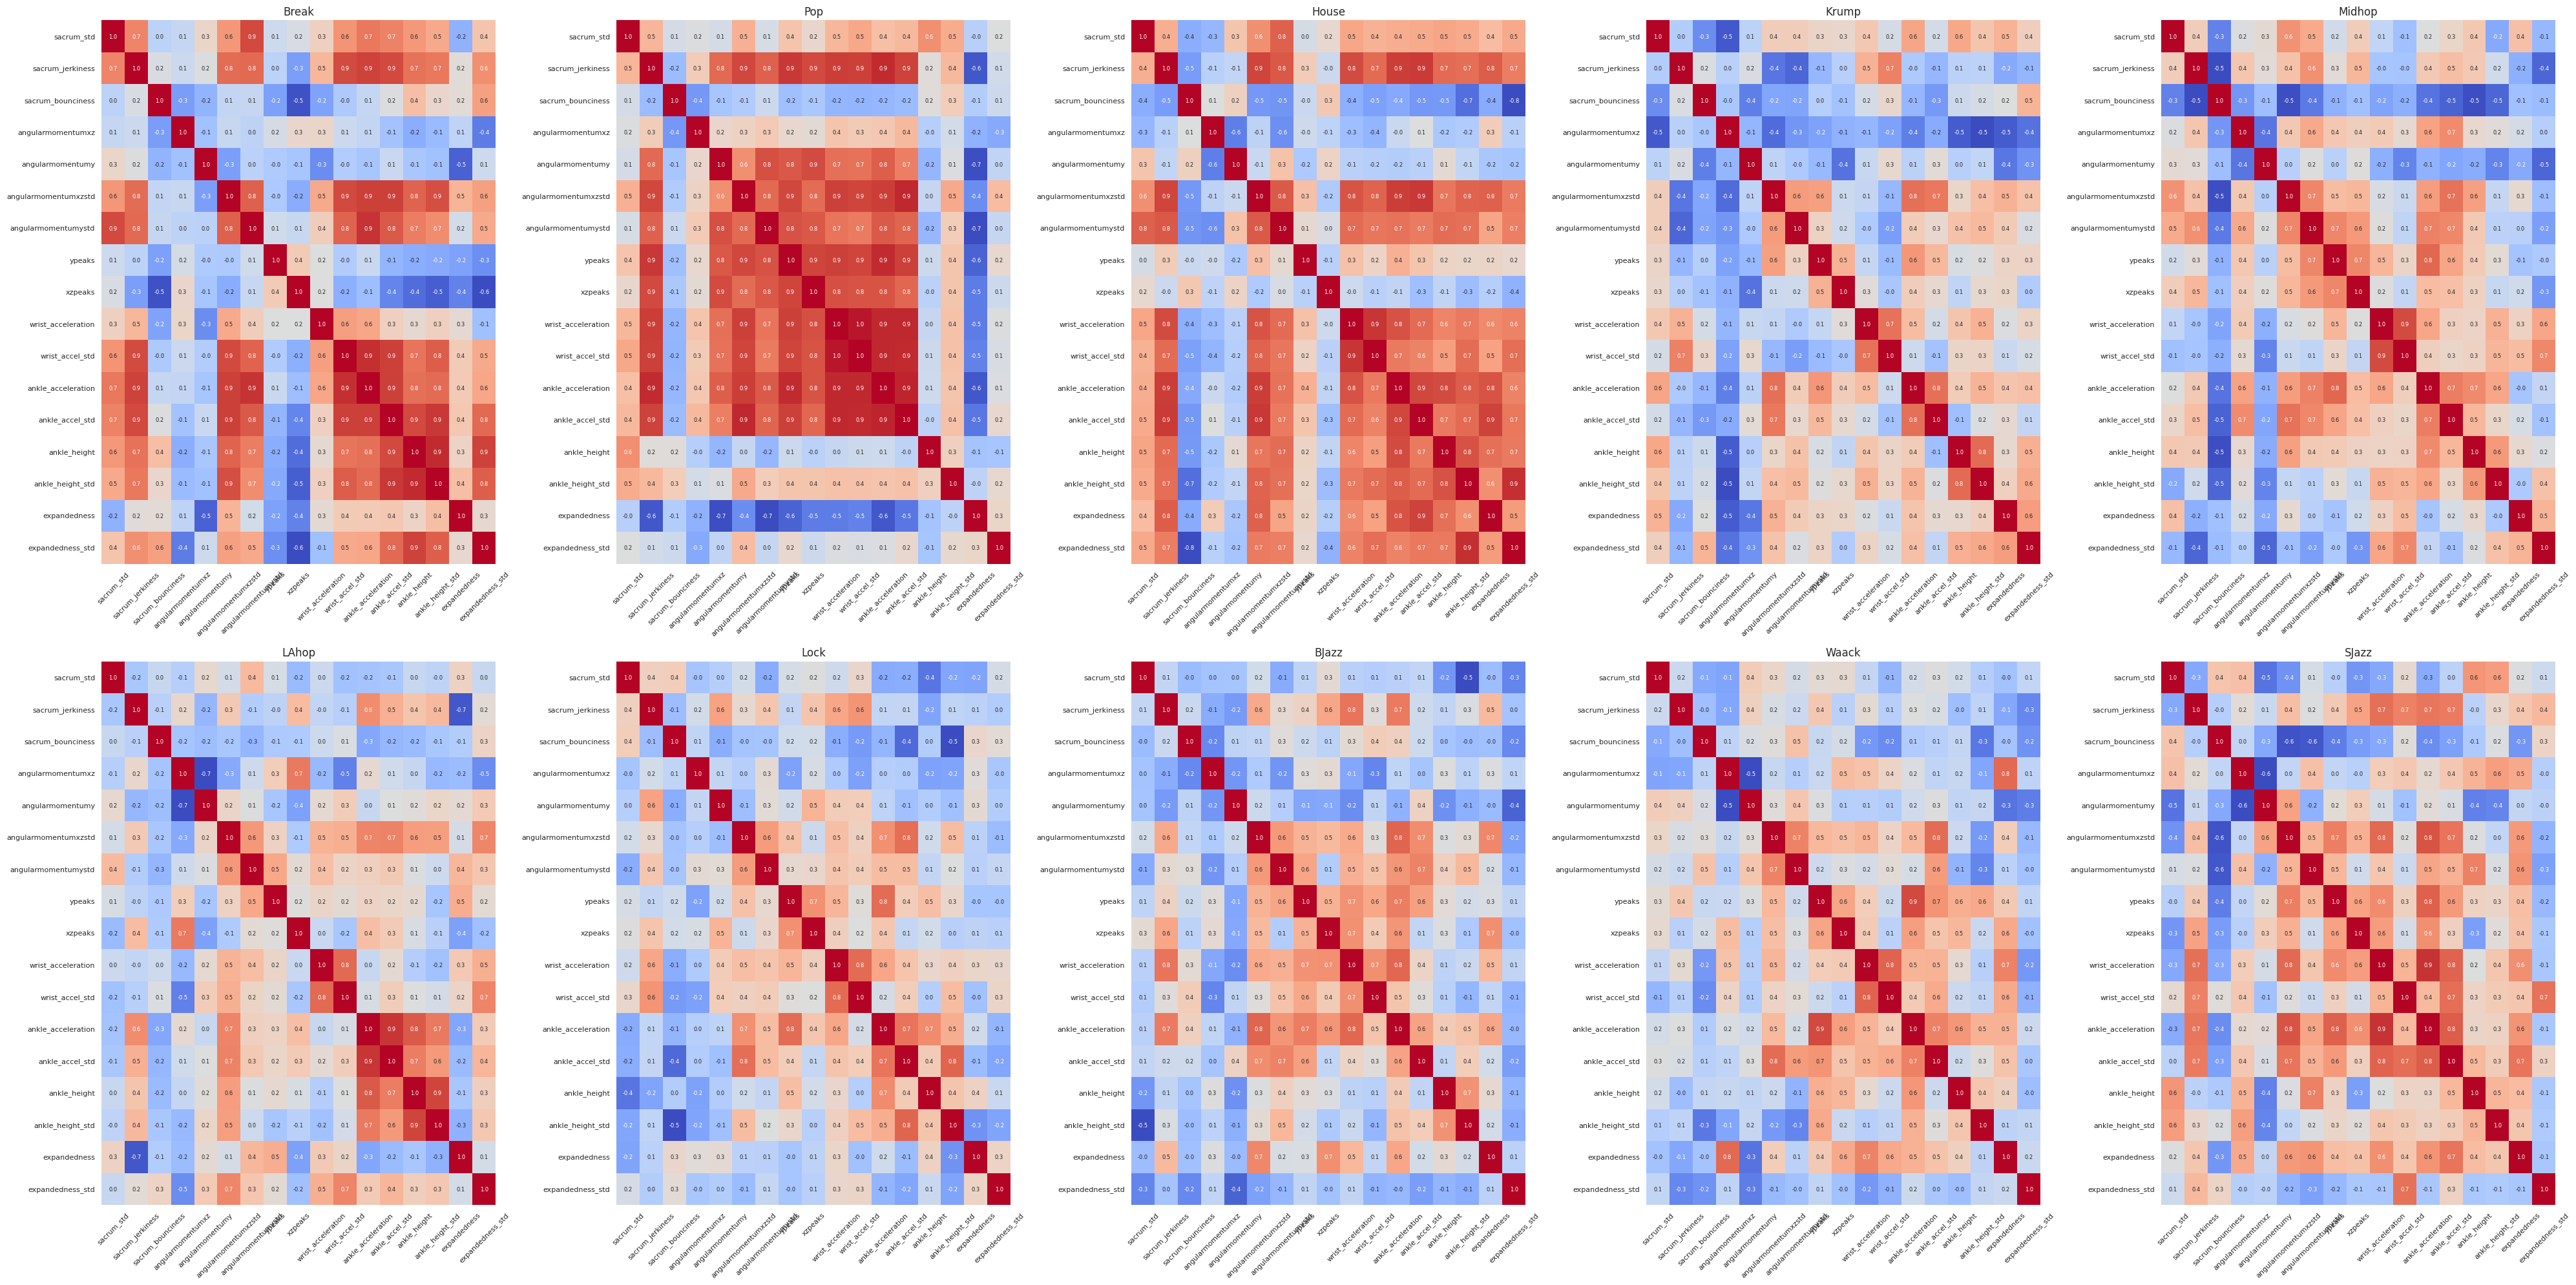

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the figure size as needed
fig, axs = plt.subplots(2, 5, figsize=(40, 20))

# List of dataframes and titles
df_list = [dfABreak_scaled, dfAPop_scaled, dfAHouse_scaled, dfAKrump_scaled, 
           dfAMidhop_scaled, dfALAhop_scaled, dfALock_scaled, dfABJazz_scaled, 
           dfAWaack_scaled, dfASJazz_scaled]
titles = ['Break', 'Pop', 'House', 'Krump', 'Midhop', 
          'LAhop', 'Lock', 'BJazz', 'Waack', 'SJazz']

# Loop through the list of dataframes
for i, (df, title) in enumerate(zip(df_list, titles)):
    # Calculate correlation
    corr = df.corr()
    
    # Select the appropriate subplot
    ax = axs[i // 5, i % 5]

    # Create a heatmap
    sns.heatmap(corr, ax=ax, cmap='coolwarm', annot=True, fmt=".1f", 
                annot_kws={'size': 6}, cbar=False)

    # Set title and adjust ticks
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Set feature labels (assuming your columns are the features)
    ax.set_xticklabels(corr.columns, minor=False)
    ax.set_yticklabels(corr.columns, minor=False)

plt.tight_layout()
plt.show()


In [25]:
#make df of features by genre
features = dfFM_scaled.columns.drop('Genre')
featuresdf = pd.DataFrame(columns=dfFM_scaled['Genre'].unique(), index=features)
#remove genre row

for i, feature in enumerate(features):
    for genre in dfFM_scaled['Genre'].unique():
        featuresdf.iloc[i][genre] = dfFM_scaled[feature][dfFM_scaled['Genre']==genre].mean()

# z scale columns of featuresdf
featuresdf_norm = featuresdf.to_numpy()

featuresdf_norm = pd.DataFrame(featuresdf_norm, columns=featuresdf.columns, index=featuresdf.index)
featuresdf_norm.head()

,Break,Pop,Lock,Midhop,LAhop,House,Waack,Krump,Street Jazz,Ballet Jazz
sacrum_std,0.199033,-0.361071,-0.51758,-0.15296,-0.524207,0.104635,-0.221281,-0.674432,-0.219798,2.452774
sacrum_jerkiness,1.208798,-1.384713,0.001889,1.076071,-0.382676,0.644818,-0.842789,0.537642,-0.785205,-0.104184
sacrum_bounciness,0.138279,0.354042,0.313269,-0.52211,-0.060426,-1.161388,0.359338,-0.008373,0.194571,0.514678
angularmomentumxz,-0.352938,0.12128,-0.550309,0.66324,-0.417703,0.883142,0.012872,-0.583,-0.007486,0.177069
angularmomentumy,1.402697,-0.392985,0.067795,0.698466,-0.059931,-0.136716,-0.479083,0.159156,-0.923221,-0.300695


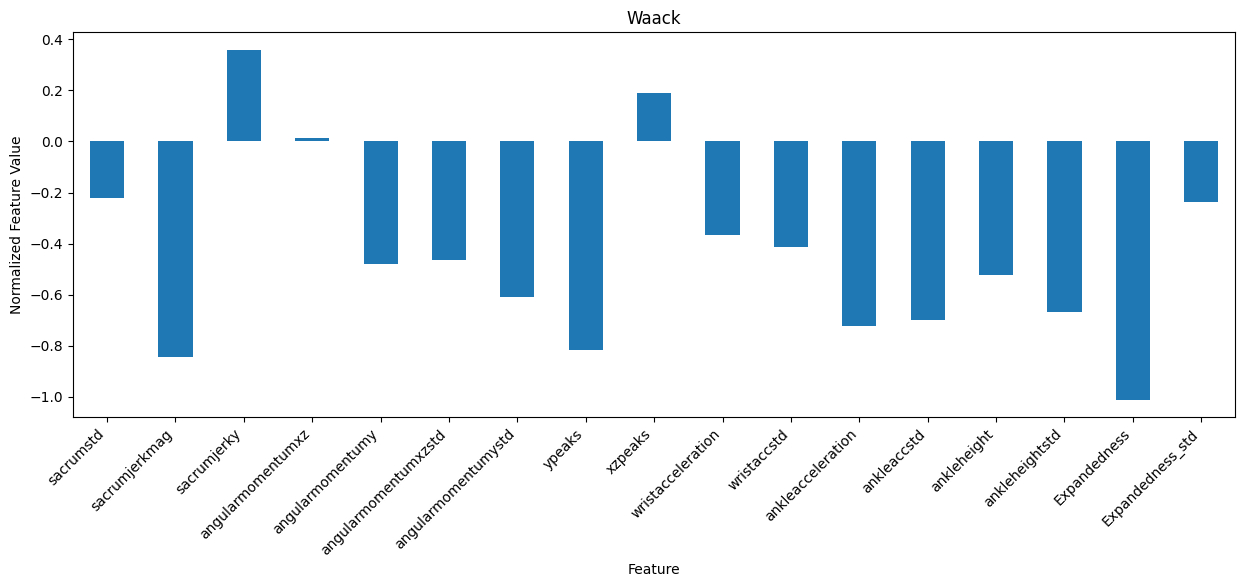

In [29]:
#bar plot of Waack, normalized features values 
featuresdf_norm['Waack'].plot(kind='bar', figsize=(15, 5))
plt.title('Waack')
#add x ticks - rows of featuresdf
plt.xticks(np.arange(len(featuresdf_norm.index)), featuresdf_norm.index, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Normalized Feature Value')
#plt.savefig('WaackFeatures.png')
plt.show()




/tmp/ipykernel_180/970660666.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(featuresdf_norm.index, fontsize=8)  # Adjust font size as needed
/tmp/ipykernel_180/970660666.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(featuresdf_norm.index, fontsize=8)  # Adjust font size as needed
/tmp/ipykernel_180/970660666.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(featuresdf_norm.index, fontsize=8)  # Adjust font size as needed
/tmp/ipykernel_180/970660666.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(featuresdf_norm.index, fontsize=8)  # Adjust font size as needed
/tmp/ipykernel_180/970660666.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(featuresdf_norm.index, fontsize=8)  # Adjust font size as needed
/tmp/ipykernel_

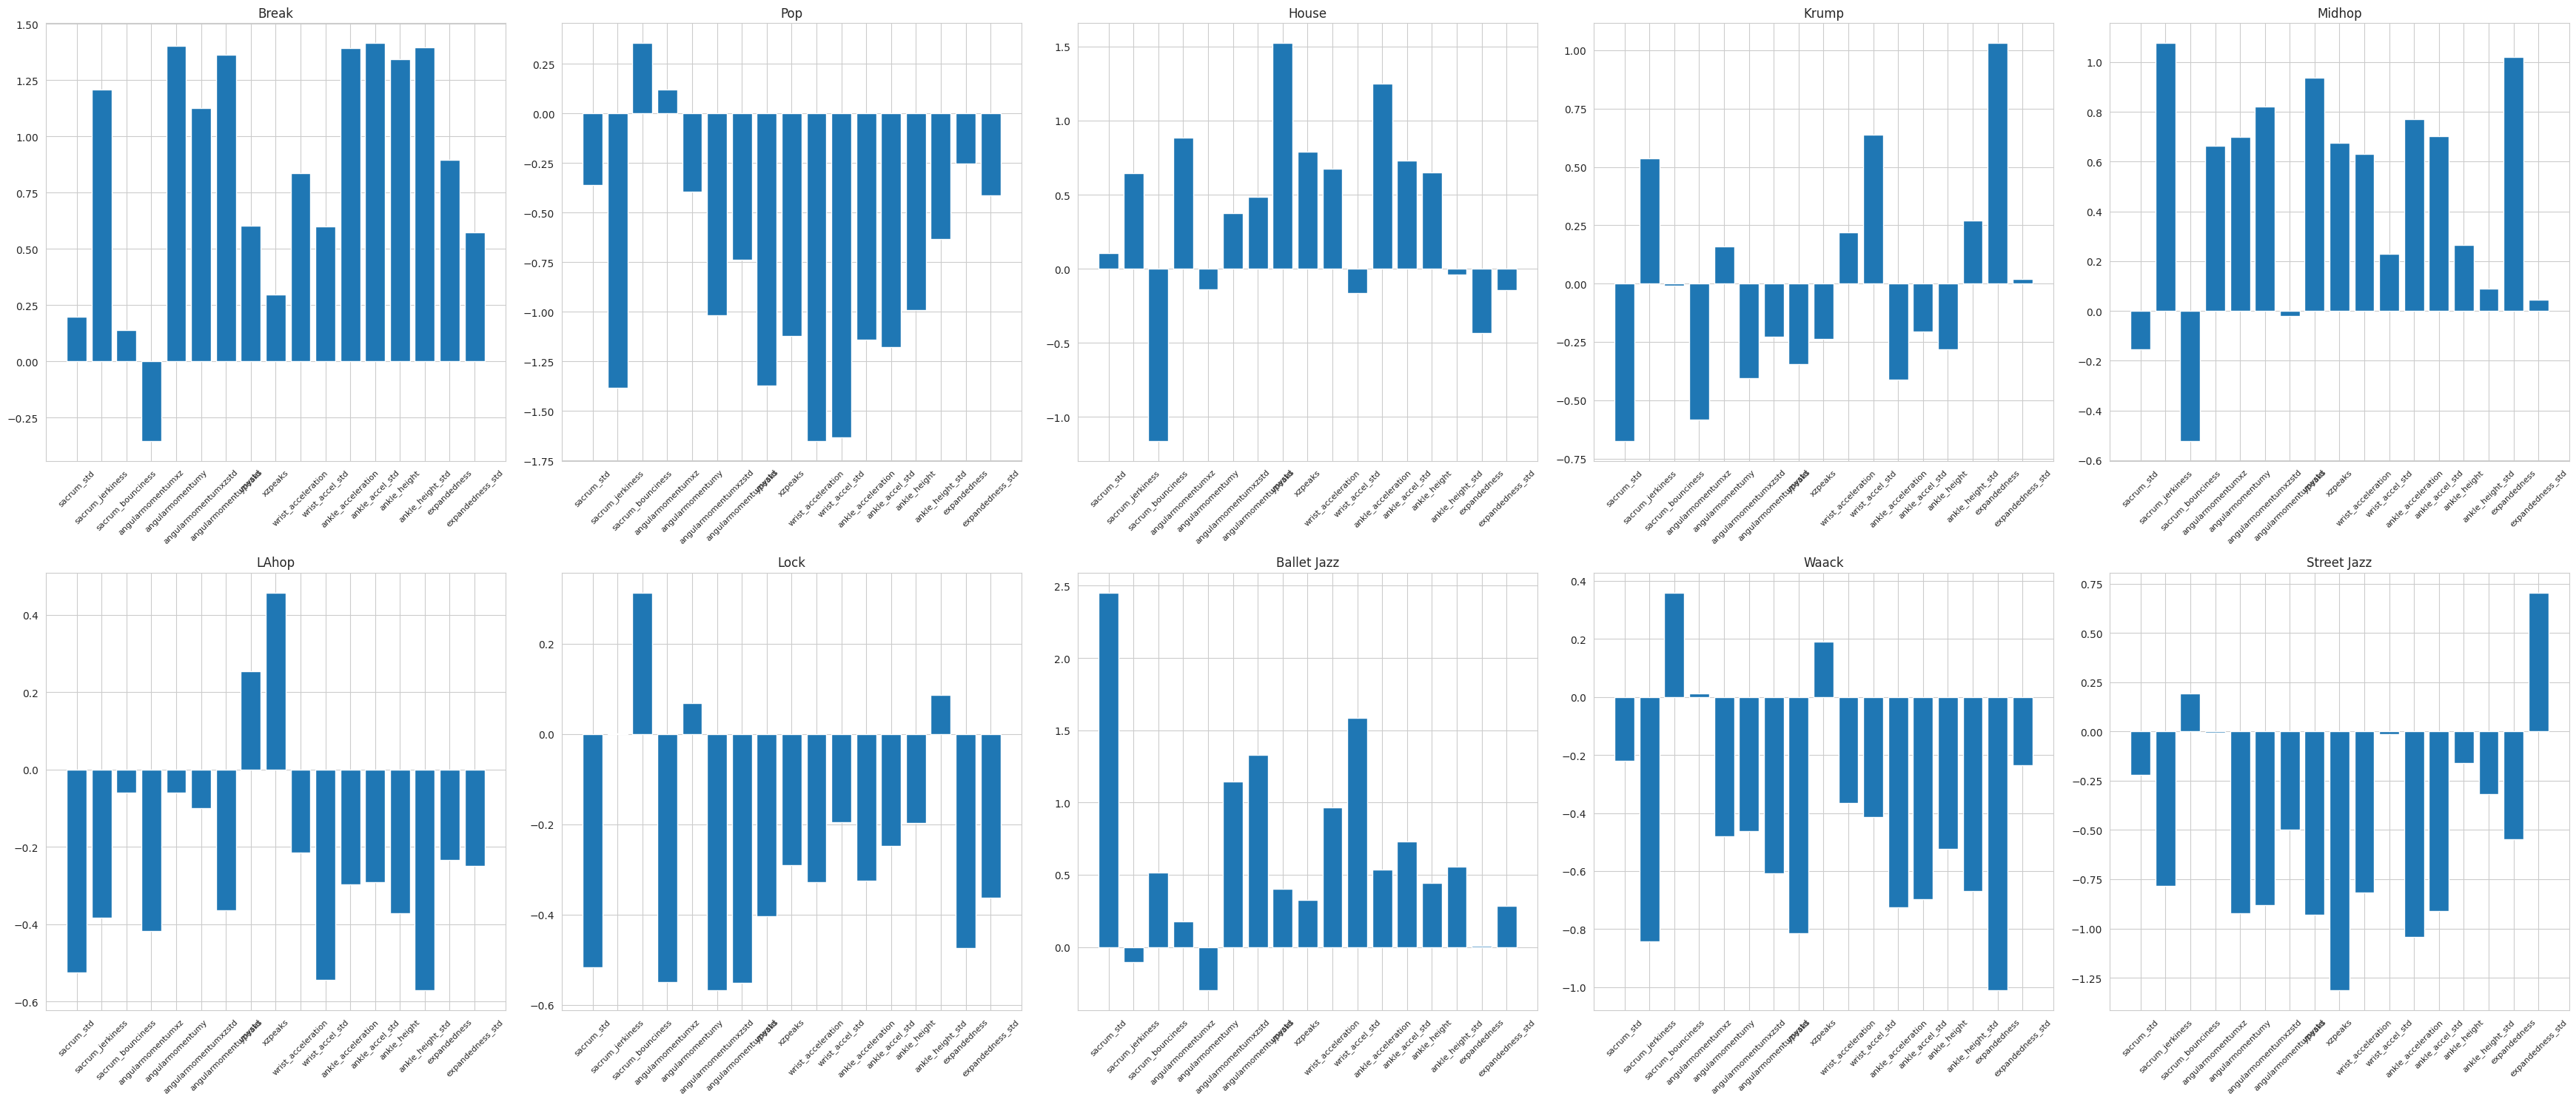

In [26]:
import matplotlib.pyplot as plt

# Assuming featuresdf_norm is your dataframe with normalized features

fig, axs = plt.subplots(2, 5, figsize=(35, 15))
genres = ['Break', 'Pop', 'House', 'Krump', 'Midhop', 'LAhop', 'Lock', 'Ballet Jazz', 'Waack', 'Street Jazz']

for ax, genre in zip(axs.flat, genres):
    ax.bar(featuresdf_norm.index, featuresdf_norm[genre])
    ax.set_title(genre)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
    ax.set_xticklabels(featuresdf_norm.index, fontsize=8)  # Adjust font size as needed

plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('AdvFeat_allgenres.png')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

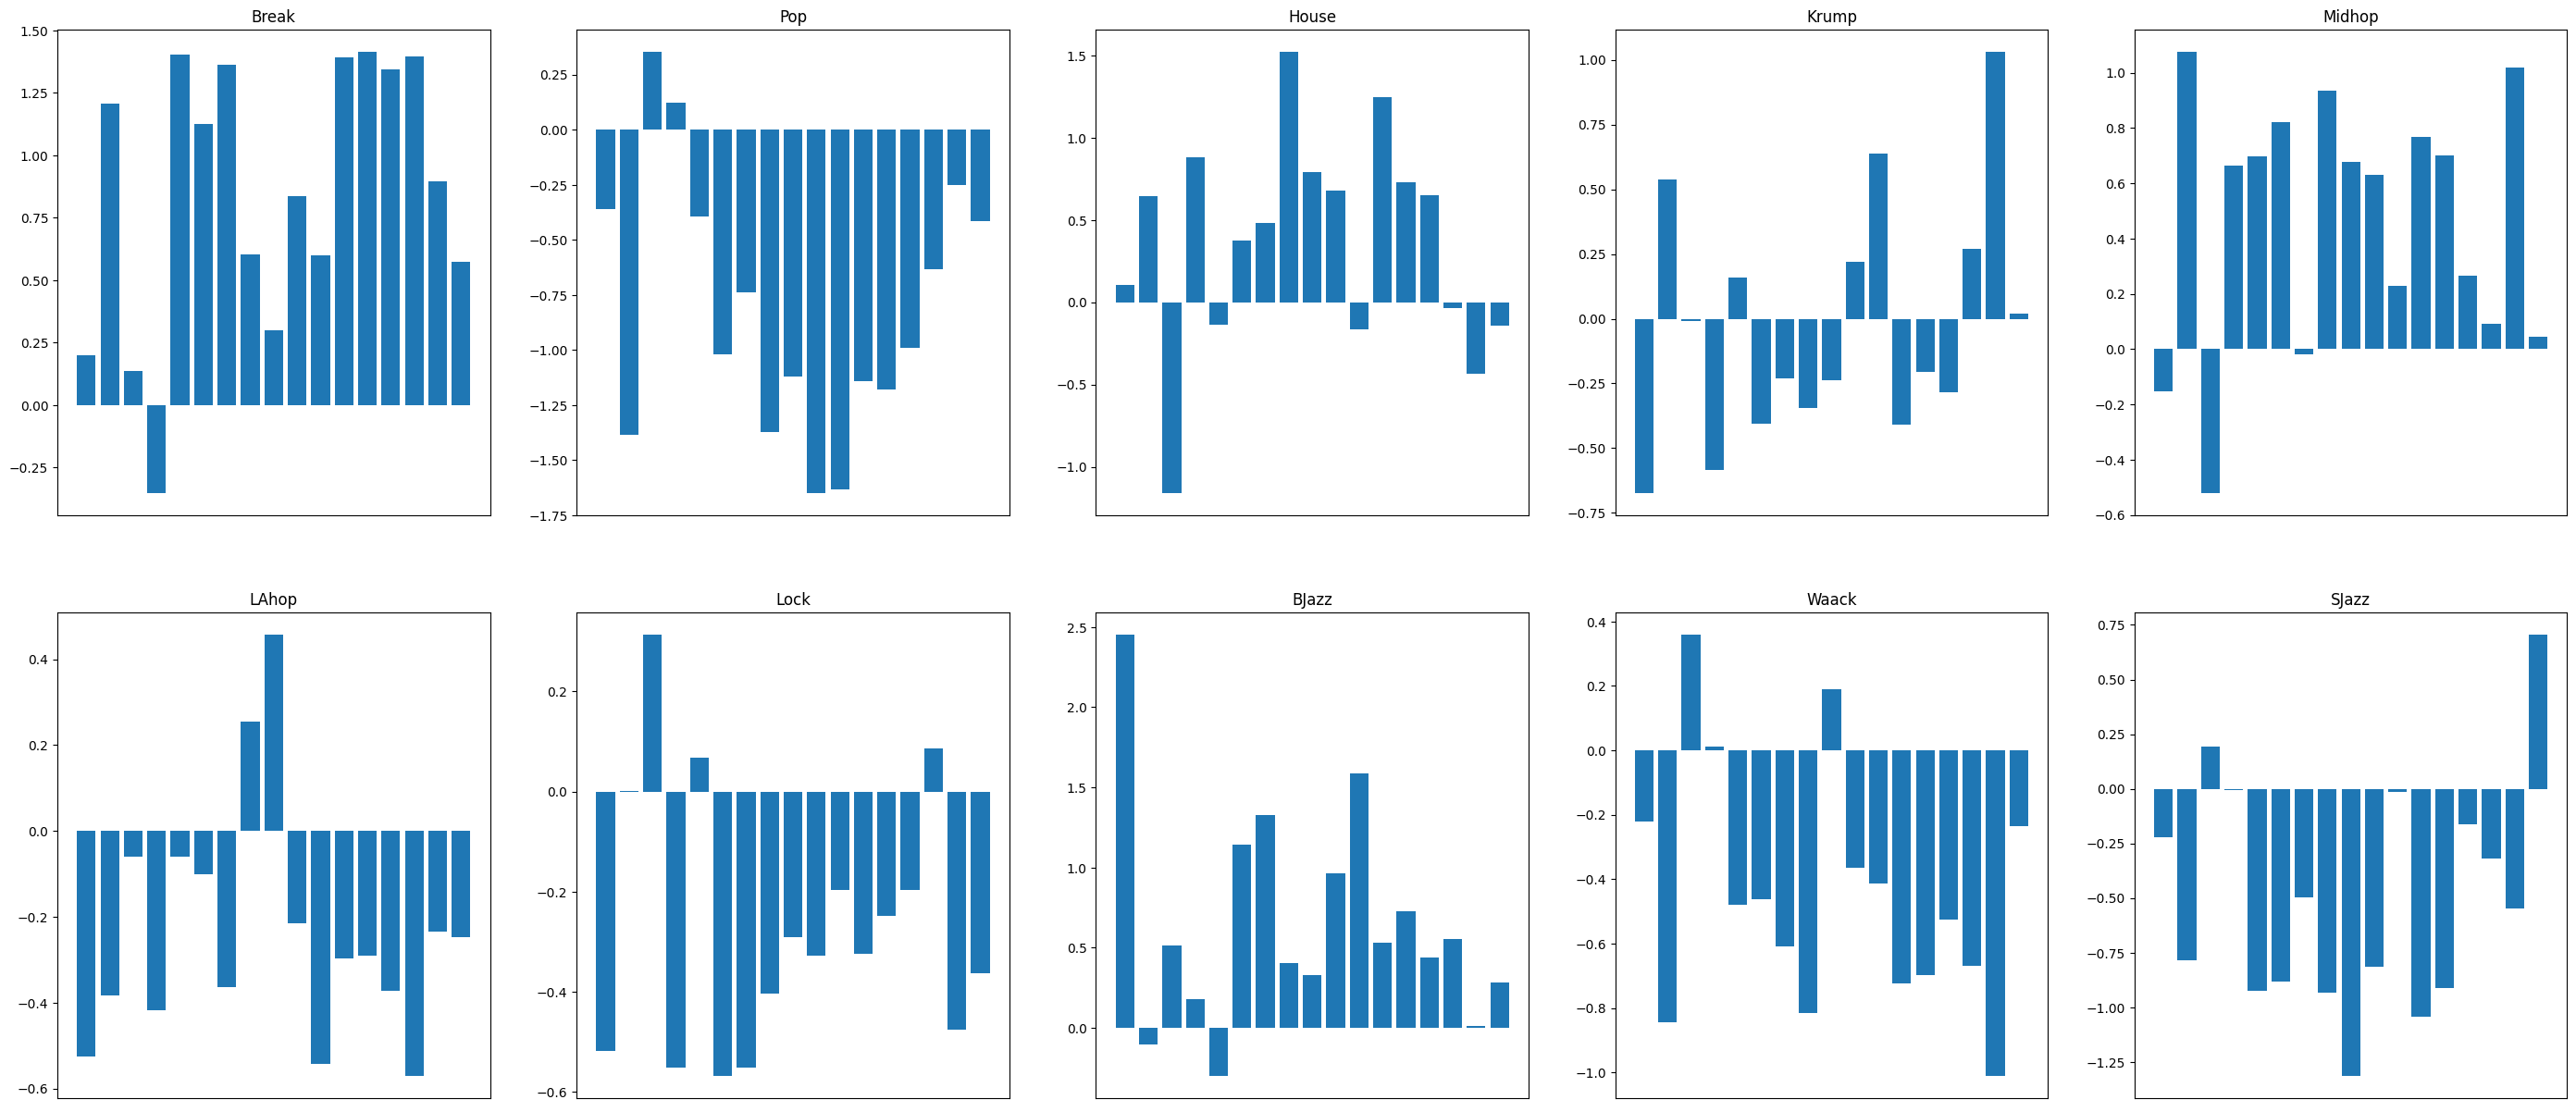

In [30]:
##bar plot of all ten genres, two by five, normalized features values 
fig, axs = plt.subplots(2, 5, figsize=(35, 15))
axs[0, 0].bar(featuresdf_norm.index, featuresdf_norm['Break'])
axs[0, 0].set_title('Break')
axs[0, 1].bar(featuresdf_norm.index, featuresdf_norm['Pop'])
axs[0, 1].set_title('Pop')
axs[0, 2].bar(featuresdf_norm.index, featuresdf_norm['House'])
axs[0, 2].set_title('House')
axs[0, 3].bar(featuresdf_norm.index, featuresdf_norm['Krump'])
axs[0, 3].set_title('Krump')
axs[0, 4].bar(featuresdf_norm.index, featuresdf_norm['Midhop'])
axs[0, 4].set_title('Midhop')
axs[1, 0].bar(featuresdf_norm.index, featuresdf_norm['LAhop'])
axs[1, 0].set_title('LAhop')
axs[1, 1].bar(featuresdf_norm.index, featuresdf_norm['Lock'])
axs[1, 1].set_title('Lock')
axs[1, 2].bar(featuresdf_norm.index, featuresdf_norm['Ballet Jazz'])
axs[1, 2].set_title('BJazz')
axs[1, 3].bar(featuresdf_norm.index, featuresdf_norm['Waack'])
axs[1, 3].set_title('Waack')
axs[1, 4].bar(featuresdf_norm.index, featuresdf_norm['Street Jazz'])
axs[1, 4].set_title('SJazz')

for ax in axs.flat:
    ax.set_xticks([])
plt.savefig('AdvFeat_allgenres.png')
plt.show

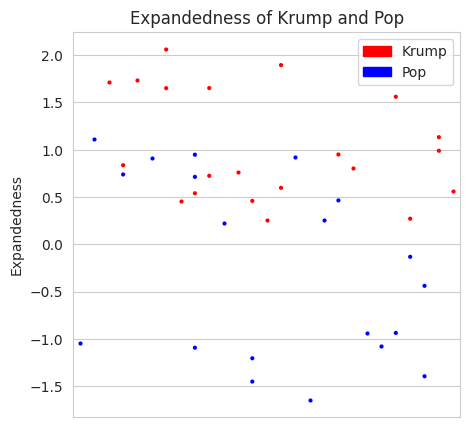

In [15]:
import matplotlib.patches as mpatches
dfAKrump_scaled['Genre_Color'] = 'red'
dfAPop_scaled['Genre_Color'] = 'blue'

# concatenate the Krump and Pop dataframes and add a new column with random integers
df_KrumpPop = pd.concat([dfAKrump_scaled, dfAPop_scaled])
df_KrumpPop['rand'] = np.random.randint(1, len(df_KrumpPop)+1, size=len(df_KrumpPop))

# plot the data using the random integers as x-axis values
fig, ax = plt.subplots(figsize=(5,5))
sns.swarmplot(data=df_KrumpPop[['Expandedness', 'rand', 'Genre_Color']], x='rand', y='Expandedness', hue='Genre_Color', palette=['blue', 'red'], size=3)
plt.title('Expandedness of Krump and Pop')
ax.set(xticklabels=[])
ax.set_xlabel('')

# Create the legend
red_patch = mpatches.Patch(color='red', label='Krump')
blue_patch = mpatches.Patch(color='blue', label='Pop')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('../plots/feature_plots/ExpandednessswarmKrumpPop.png')
plt.show()


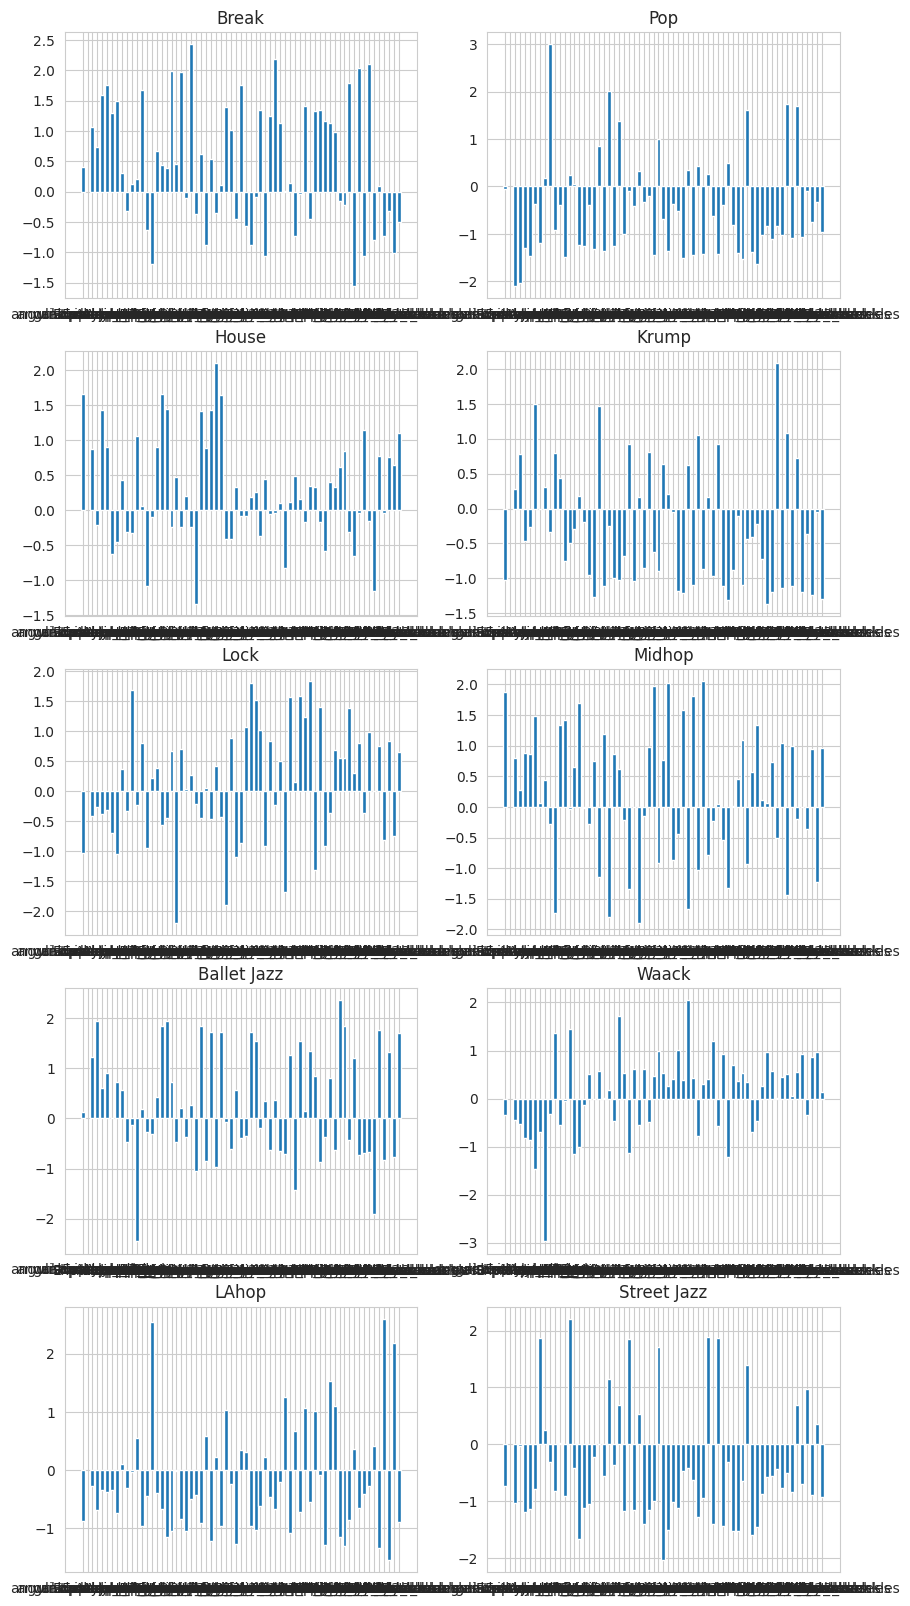

In [42]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

axs[0, 0].bar(featuresdf_norm.index, featuresdf_norm['Break'])
axs[0, 0].set_title('Break')
axs[0, 1].bar(featuresdf_norm.index, featuresdf_norm['Pop'])
axs[0, 1].set_title('Pop')
axs[1, 0].bar(featuresdf_norm.index, featuresdf_norm['House'])
axs[1, 0].set_title('House')
axs[1, 1].bar(featuresdf_norm.index, featuresdf_norm['Krump'])
axs[1, 1].set_title('Krump')
axs[2, 0].bar(featuresdf_norm.index, featuresdf_norm['Lock'])
axs[2, 0].set_title('Lock')
axs[2, 1].bar(featuresdf_norm.index, featuresdf_norm['Midhop'])
axs[2, 1].set_title('Midhop')
axs[3, 0].bar(featuresdf_norm.index, featuresdf_norm['Ballet Jazz'])
axs[3, 0].set_title('Ballet Jazz')
axs[3, 1].bar(featuresdf_norm.index, featuresdf_norm['Waack'])
axs[3, 1].set_title('Waack')
axs[4, 0].bar(featuresdf_norm.index, featuresdf_norm['LAhop'])
axs[4, 0].set_title('LAhop')
axs[4, 1].bar(featuresdf_norm.index, featuresdf_norm['Street Jazz'])
axs[4, 1].set_title('Street Jazz')
plt.savefig('featurebar_genres_sparse.png')
plt.show()